# EDA of MSE
- Updated 2023.04.20
- Written by shyeon

### Preparing to run the code

In [1]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

curr_path = Path().absolute()
os.chdir(curr_path.parent)  # change working directory to parent path

### Loading a dataframe containing evaluations of prediction performance
- value_df: (156232, 66)

In [2]:
with open("data/evaluation/mse.pickle", "rb") as f:
    mse_df = pickle.load(f)

In [3]:
mse_df = mse_df.reset_index().drop(["index"], axis=1)
mse_df.head()

,num_xs,y,mse,ranker,alpha
0,1,53,1.010975,RadioRank,0.1
1,1,36,0.971325,RadioRank,0.1
2,1,19,0.977164,RadioRank,0.1
3,1,14,0.640365,RadioRank,0.1
4,1,11,0.922290,RadioRank,0.1


In [4]:
mes_max = mse_df.groupby(by=["ranker", "alpha", "num_xs"]).max()[["mse"]]
mes_max["method"] = "max"
mes_mean = mse_df.groupby(by=["ranker", "alpha", "num_xs"]).mean()[["mse"]]
mes_mean["method"] = "mean"
mes_min = mse_df.groupby(by=["ranker", "alpha", "num_xs"]).min()[["mse"]]
mes_min["method"] = "min"
mes_total = pd.concat([mes_mean, mes_max, mes_min])
mes_total = mes_total.reset_index()
mes_total["alpha"] = np.around(mes_total["alpha"], decimals=1)

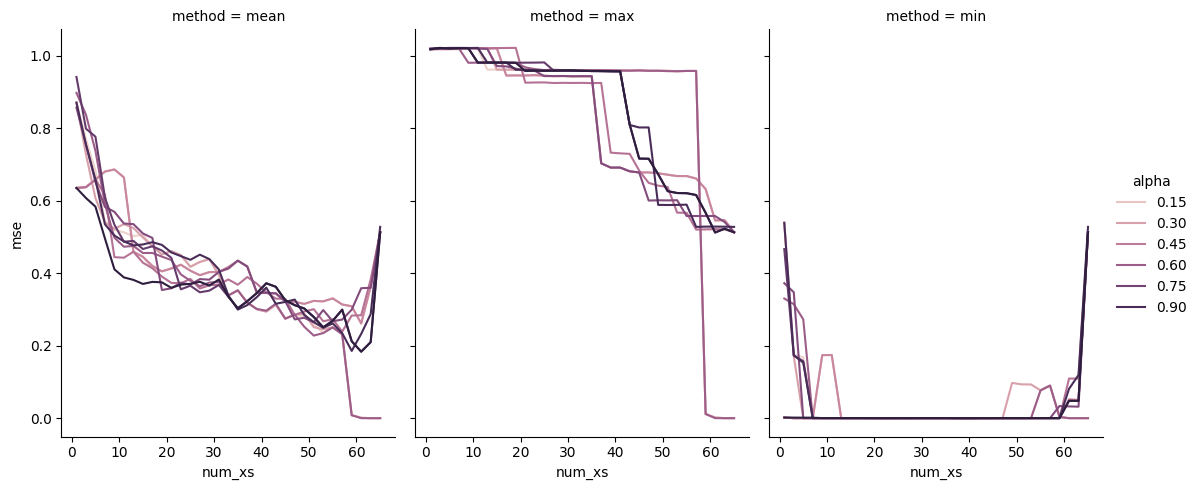

In [6]:
# Plot the lines on two facets
sns.relplot(
    data=mes_total[mes_total["ranker"] == "PageRank"],
    x="num_xs", y="mse",
    hue="alpha", col="method",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

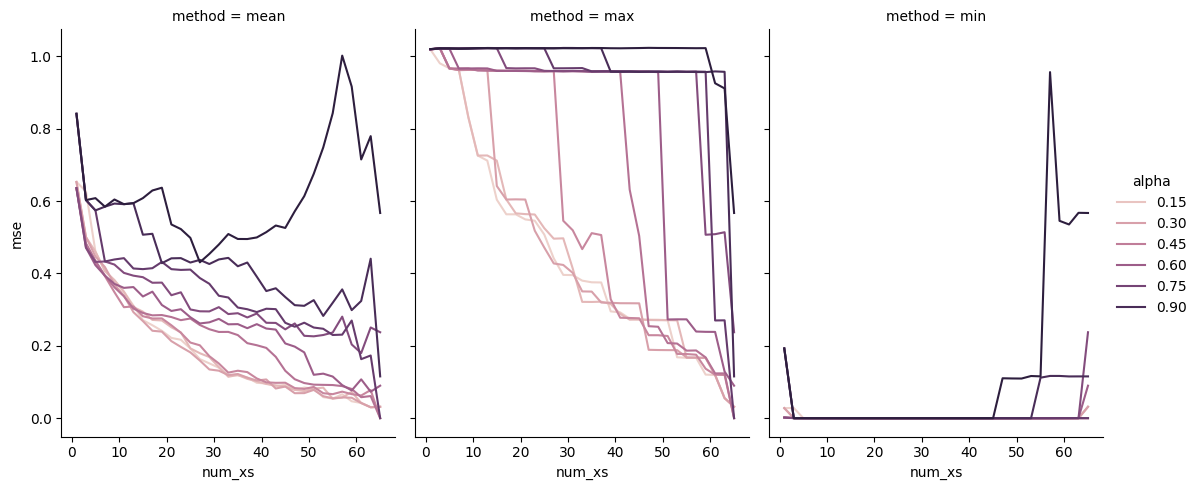

In [7]:
# Plot the lines on two facets
sns.relplot(
    data=mes_total[mes_total["ranker"] == "RadioRank"],
    x="num_xs", y="mse",
    hue="alpha", col="method",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

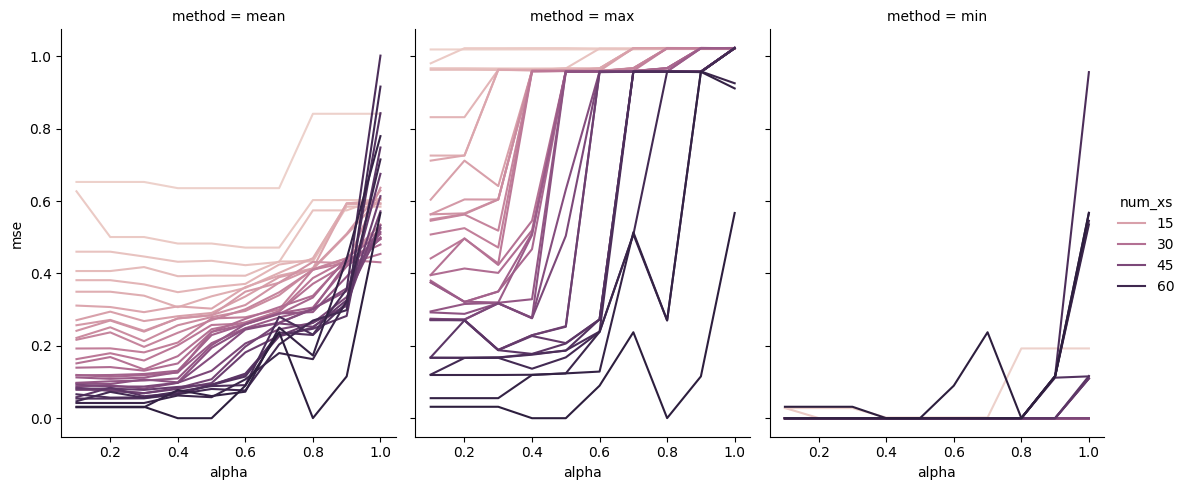

In [8]:
# Plot the lines on two facets
sns.relplot(
    data=mes_total[mes_total["ranker"] == "RadioRank"],
    x="alpha", y="mse",
    hue="num_xs", col="method",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)